### Hyperparameters

In [1]:
from keras.callbacks import EarlyStopping

# Stopping training when validation loss does not improve
callbacks = [EarlyStopping(monitor="val_accuracy", patience=7),
             EarlyStopping(monitor="val_loss", patience=7)]

EPOCHS = 50
BATCH_SIZE = 128

EMBEDDING_DIM = 100
LSTM_UNITS = 64

### Loading data

In [2]:
from data.norec.dataloader import load_full_dataset
from data.dataloader import load_data

# Load binary data
binary_dataset = load_full_dataset(binary=True)
binary_data = load_data(binary_dataset)

# Load multiclass data
multiclass_dataset = load_full_dataset()
multiclass_data = load_data(multiclass_dataset)

Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!
Cleaning text...
Fitting tokenizer...
Converting texts to sequences...
Padding sequences...
One-hot encoding labels...
Done!


# Classifying with multiclass dataset

In [3]:
X_train = multiclass_data['X_train']
X_val = multiclass_data['X_val']
X_test = multiclass_data['X_test']
y_train = multiclass_data['y_train']
y_val = multiclass_data['y_val']
y_test = multiclass_data['y_test']
num_words = multiclass_data['num_words']
maxlen = multiclass_data['maxlen']
num_classes = multiclass_data['num_classes']
multiclass_tokenizer = multiclass_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 219)
X_val shape: (4360, 219)
X_test shape: (4351, 219)
y_train shape: (34903, 3)
y_val shape: (4360, 3)
y_test shape: (4351, 3)
num_words: 20000
maxlen: 219
num_classes: 3


### Load embeddings

In [4]:
from utils.embeddings import load_embeddings
import numpy as np
from tqdm import tqdm

embeddings_index = load_embeddings()

word_index = multiclass_tokenizer.word_index

vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in tqdm(word_index.items(), desc="Creating embedding matrix"):
    embedding_vector = embeddings_index.item().get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Creating embedding matrix: 100%|██████████| 295919/295919 [00:00<00:00, 544482.85it/s]


In [5]:
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(LSTM(LSTM_UNITS))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 219, 100)          29592000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 29,634,435
Trainable params: 42,435
Non-trainable params: 29,592,000
_________________________________________________________________


In [6]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)

Epoch 1/50
273/273 [==============================] - 15s 45ms/step - loss: 0.7004 - accuracy: 0.7481 - val_loss: 0.6247 - val_accuracy: 0.7745
Epoch 2/50
273/273 [==============================] - 11s 42ms/step - loss: 0.6508 - accuracy: 0.7500 - val_loss: 0.5887 - val_accuracy: 0.7748
Epoch 3/50
273/273 [==============================] - 12s 42ms/step - loss: 0.6205 - accuracy: 0.7543 - val_loss: 0.5621 - val_accuracy: 0.7812
Epoch 4/50
273/273 [==============================] - 12s 46ms/step - loss: 0.5968 - accuracy: 0.7605 - val_loss: 0.5845 - val_accuracy: 0.7835
Epoch 5/50
273/273 [==============================] - 12s 46ms/step - loss: 0.5822 - accuracy: 0.7653 - val_loss: 0.5589 - val_accuracy: 0.7837
Epoch 6/50
273/273 [==============================] - 13s 47ms/step - loss: 0.5601 - accuracy: 0.7730 - val_loss: 0.5345 - val_accuracy: 0.7917
Epoch 7/50
273/273 [==============================] - 13s 47ms/step - loss: 0.5414 - accuracy: 0.7809 - val_loss: 0.5497 - val_accuracy:

In [7]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 3s 22ms/step - loss: 0.5373 - accuracy: 0.7936
Validation loss: 0.5372724533081055
Validation accuracy: 0.793610692024231


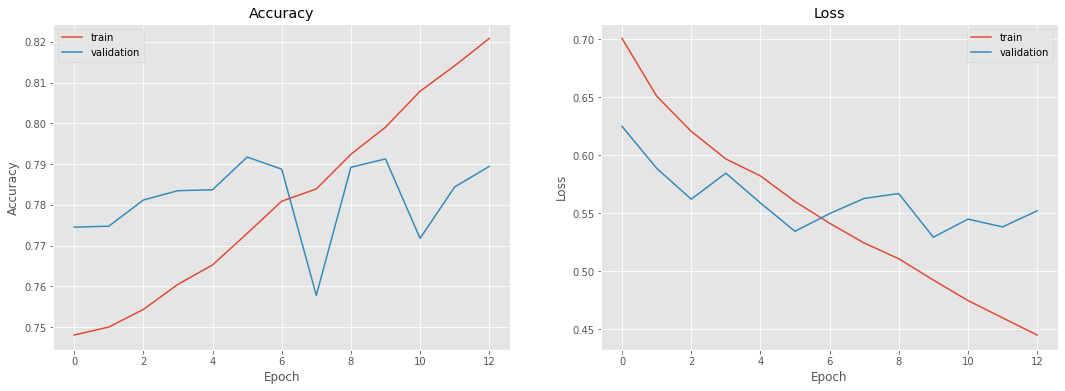

In [8]:
from utils.visualization import plot_history

plot_history(history, save=False, show=True)

# Classifying with binary dataset

In [9]:
X_train = binary_data['X_train']
X_val = binary_data['X_val']
X_test = binary_data['X_test']
y_train = binary_data['y_train']
y_val = binary_data['y_val']
y_test = binary_data['y_test']
num_words = binary_data['num_words']
maxlen = binary_data['maxlen']
num_classes = binary_data['num_classes']
binary_tokenizer = binary_data['tokenizer']

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)
print('num_words:', num_words)
print('maxlen:', maxlen)
print('num_classes:', num_classes)

X_train shape: (34903, 219)
X_val shape: (4360, 219)
X_test shape: (4351, 219)
y_train shape: (34903, 2)
y_val shape: (4360, 2)
y_test shape: (4351, 2)
num_words: 20000
maxlen: 219
num_classes: 2


### Load embeddings

In [10]:
word_index = binary_tokenizer.word_index

vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in tqdm(word_index.items(), desc="Creating embedding matrix"):
    embedding_vector = embeddings_index.item().get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Creating embedding matrix: 100%|██████████| 295919/295919 [00:00<00:00, 310226.71it/s]


In [11]:
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(LSTM(LSTM_UNITS))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 219, 100)          29592000  
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 29,634,370
Trainable params: 42,370
Non-trainable params: 29,592,000
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=1,
                    callbacks=callbacks)

Epoch 1/50
273/273 [==============================] - 16s 52ms/step - loss: 0.5482 - accuracy: 0.7482 - val_loss: 0.5255 - val_accuracy: 0.7775
Epoch 2/50
273/273 [==============================] - 15s 54ms/step - loss: 0.5077 - accuracy: 0.7603 - val_loss: 0.4712 - val_accuracy: 0.7833
Epoch 3/50
273/273 [==============================] - 16s 60ms/step - loss: 0.4880 - accuracy: 0.7691 - val_loss: 0.4747 - val_accuracy: 0.7878
Epoch 4/50
273/273 [==============================] - 15s 53ms/step - loss: 0.4647 - accuracy: 0.7834 - val_loss: 0.4324 - val_accuracy: 0.8037
Epoch 5/50
273/273 [==============================] - 14s 52ms/step - loss: 0.4440 - accuracy: 0.7949 - val_loss: 0.4323 - val_accuracy: 0.8067
Epoch 6/50
273/273 [==============================] - 15s 54ms/step - loss: 0.4225 - accuracy: 0.8078 - val_loss: 0.4139 - val_accuracy: 0.8181
Epoch 7/50
273/273 [==============================] - 15s 55ms/step - loss: 0.4040 - accuracy: 0.8177 - val_loss: 0.4222 - val_accuracy:

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

136/136 [==============================] - 3s 19ms/step - loss: 0.4581 - accuracy: 0.7922
Validation loss: 0.4581083357334137
Validation accuracy: 0.7922316789627075


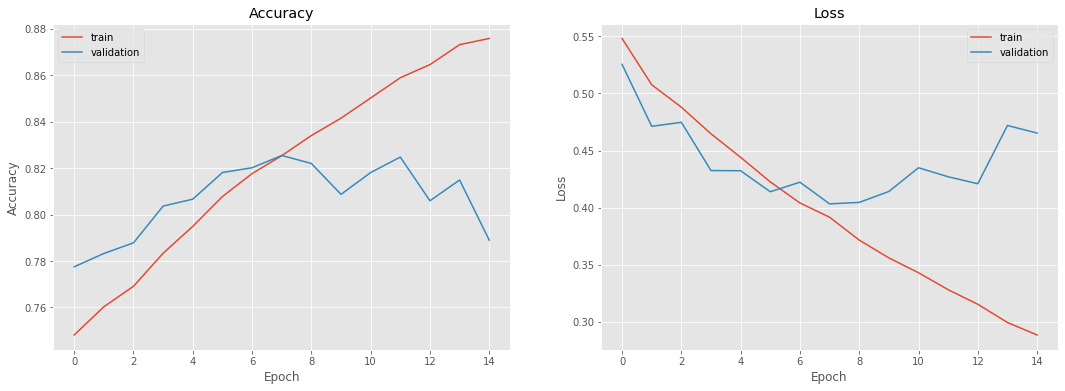

In [14]:
plot_history(history, save=False, show=True)